In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
compact_result = pd.read_csv('./data/NCAATourneyCompactResults.csv')

In [16]:
train, test = train_test_split(compact_result, test_size=.2)

In [24]:
train.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1394,2007,136,1139,57,1330,46,N,0
1338,2006,136,1285,87,1305,79,N,0
69,1986,136,1257,93,1180,73,N,0
1357,2006,137,1338,79,1245,64,N,0
1669,2011,137,1181,87,1214,45,N,0


In [40]:
num_win = train.groupby('WTeamID').size().to_frame()
num_loss = train.groupby('LTeamID').size().to_frame()

In [63]:
num_win.columns=['n_wins']
num_loss.columns=['n_loss']
num_win.index.names=['TeamID']
num_loss.index.names=['TeamID']

In [68]:
win_loss = pd.merge(num_win, num_loss, left_index=True, right_index=True)

In [75]:
win_loss['n_games'] = win_loss.sum(1)

In [77]:
win_loss['p_win'] = win_loss['n_wins'] / win_loss['n_games']

In [79]:
team_names = pd.read_csv('./data/Teams.csv')

In [80]:
team_names.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [82]:
win_loss['TeamID'] = win_loss.index

In [103]:
named = pd.merge(win_loss, team_names).sort_values('p_win', ascending=False)

In [105]:
named.reset_index()

,index,n_wins,n_loss,n_games,p_win,TeamID,TeamName,FirstD1Season,LastD1Season
0,24,45,10,55,0.818182,1163,Connecticut,1985,2018
1,98,76,20,96,0.791667,1314,North Carolina,1985,2018
2,33,78,21,99,0.787879,1181,Duke,1985,2018
3,61,60,19,79,0.759494,1246,Kentucky,1985,2018
4,66,3,1,4,0.750000,1258,Loy Marymount,1985,2018
5,145,3,1,4,0.750000,1408,Tulane,1985,2018
6,58,69,23,92,0.750000,1242,Kansas,1985,2018
7,37,39,15,54,0.722222,1196,Florida,1985,2018
8,1,44,19,63,0.698413,1112,Arizona,1985,2018
9,77,29,13,42,0.690476,1276,Michigan,1985,2018


In [98]:
named[named['TeamName'] == 'Stanford']

,n_wins,n_loss,n_games,p_win,TeamID,TeamName,FirstD1Season,LastD1Season
137,14,10,24,0.583333,1390,Stanford,1985,2018


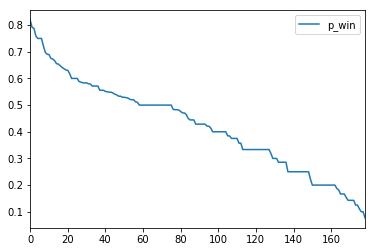

In [107]:
named.reset_index().plot(y='p_win', use_index=True)